In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr, pearsonr

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
path_arakawa = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/arakawa_ara.csv"
arakawa = pd.read_csv(path_arakawa, sep= ",")
path_MaG = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/MaG_ara.csv"
mag =pd.read_csv(path_MaG, sep= ",")
path_all = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_all_fam.csv"
# path_3 = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_3_fam.csv"
path_1 = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_1_fam.csv"
# path_MaG = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/MaG_ara.csv"

path_GC = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/count_mag_ara.csv"
Gene_c = pd.read_csv(path_GC, sep= ",")

# all = pd.read_csv(path_all, sep= ",")
# three = pd.read_csv(path_3, sep= ",")
# one =pd.read_csv(path_1, sep= ",")

In [3]:

# # read csv
# path_tail_sac = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/tail_sac_log_multisp.csv"
# small_path = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/pca1_araneidae_selected_features.csv"
# path_anno = "C:/Users/46705/Documents/SpiderSilk/data/annotations/annotation.csv"
# file_connectoion = "C:/Users/46705/Documents/SpiderSilk/data/raw_data/S1-S4/data_s1.csv"
# file_arakawa_anno = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/arakawa_anno_log_multisp.csv"


# ara_df = df = pd.read_csv(file_arakawa_anno, sep= ",")
# df_anno = pd.read_csv(path_anno, sep= ",")
# df_big = pd.read_csv(path_tail_sac, sep= ",")
# small_df = df = pd.read_csv(small_path, sep= ",")

In [4]:
df = mag

In [5]:
df.iloc[:, -29:].columns

Index(['family', 'genus', 'species_y', 'ncbi_tax_id', 'wsc_lsid',
       'type_of_web', 'sex', 'sampled_at', 'country', 'size', 'toughness',
       'toughness_sd', 'young's_modulus', 'young's_modulus_sd',
       'tensile_strength', 'tensile_strength_sd', 'strain_at_break',
       'strain_at_break_sd', 'one_percent_weightloss',
       'five_percent_weightloss', 'ten_percent_weightloss', 'crystallinity',
       'birefringence', 'birefringence_sd', 'diameter', 'diameter_sd',
       'water_content', 'supercontraction', 'supercontraction_sd'],
      dtype='object')

In [6]:
# setingt variables
# prop = ["toughness"]
prop = ["toughness", "young's_modulus", 
       'tensile_strength',  'strain_at_break']

features_df = df.iloc[4:, 7:-29]
properties_df = df.loc[4:, :][prop]
df.iloc[:, 7:-29]

columns_with_spidroin = df.columns[df.iloc[0] == "Spidroin"]

print(columns_with_spidroin)


features_df = features_df.astype(float)
X = features_df.values
y = properties_df.values




Index(['OG0000050', 'OG0002778', 'OG0007640'], dtype='object')


<Axes: >

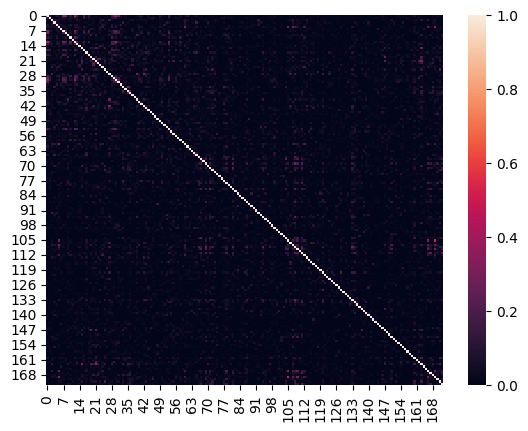

In [7]:
sns.heatmap(np.corrcoef(X, rowvar=  False)**2)

Test example

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

R-Squared Error: -0.08428806973659658
Mean Squared Error: [4.93550129e-03 1.81766483e+01 2.47757629e-01 4.83676703e+01]
R2 Score: [ 0.02816174 -0.15867337  0.03141618 -0.23805682]


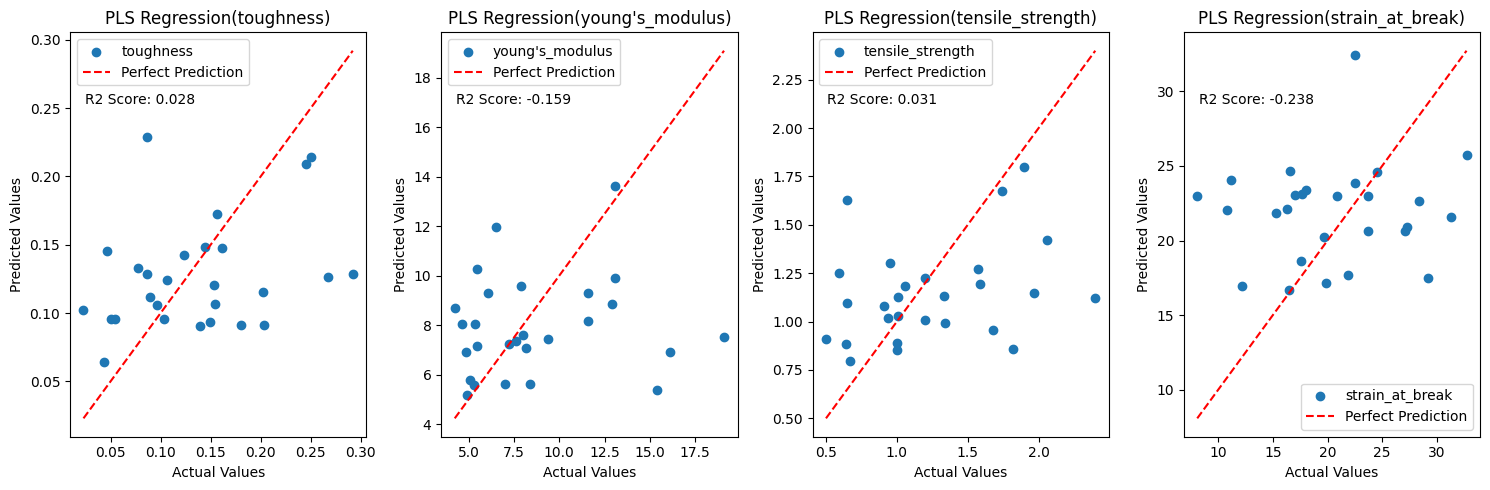

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_components = 2
pls_model = PLSRegression(n_components=n_components)

pls_model.fit(X_train, y_train)

y_pred = pls_model.predict(X_test)

r_squared = pls_model.score(X_test, y_test)
print(f"R-Squared Error: {r_squared}")
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')  
r2 = r2_score(y_test, y_pred, multioutput='raw_values') 
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

n_dimensions = y_test.shape[1]


fig, axs = plt.subplots(1, n_dimensions, figsize=(15, 5))  

for i, label in enumerate(prop):

    axs[i].scatter(y_test[:, i], y_pred[:, i], label=label)

    min_y, max_y = y_test[:, i].min(), y_test[:, i].max()
    axs[i].plot([min_y, max_y], [min_y, max_y], '--', c='red', label='Perfect Prediction')

    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")
    axs[i].set_title("PLS Regression({})".format(label))
    axs[i].legend()
    r2_text = f"R2 Score: {r2[i]:.3f}"
    axs[i].text(0.05, 0.85, r2_text, transform=axs[i].transAxes, fontsize=10, verticalalignment='top')
    
plt.tight_layout()  
plt.show()  


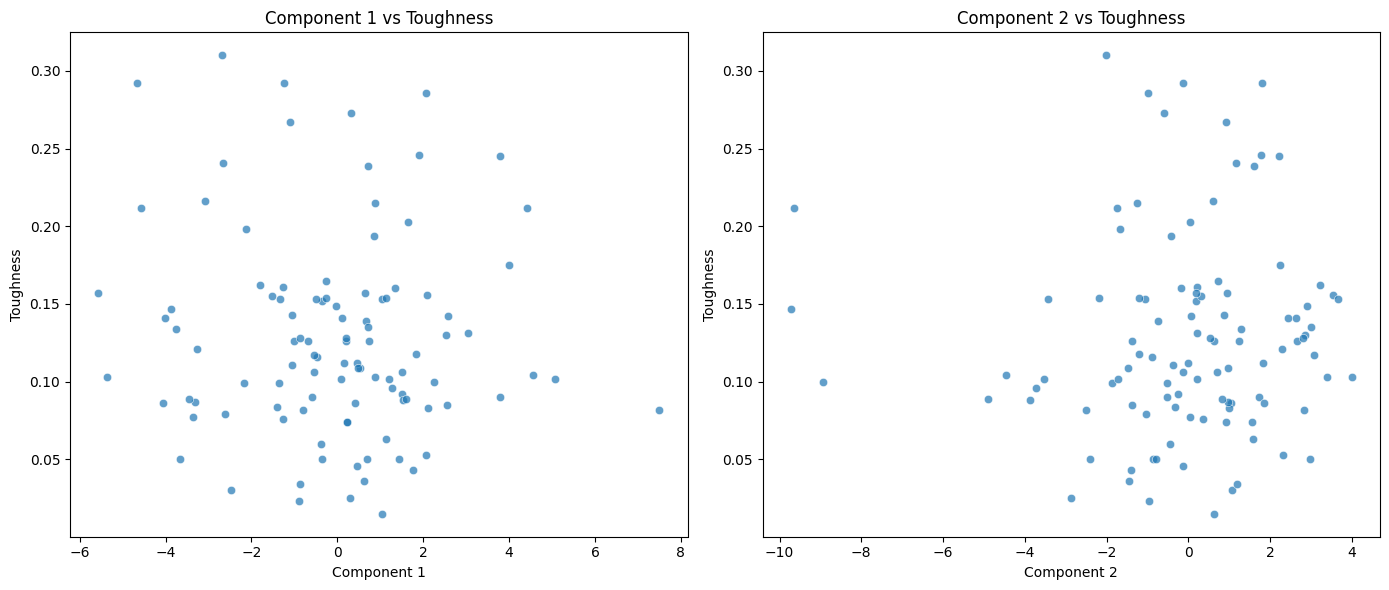

In [11]:
X_scores = pls_model.x_scores_

scores_df = pd.DataFrame(X_scores, columns=['Component 1', 'Component 2'])
scores_df['Toughness'] = mag['toughness']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(scores_df['Component 1'], scores_df['Toughness'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Component 1 vs Toughness')
plt.xlabel('Component 1')
plt.ylabel('Toughness')

plt.subplot(1, 2, 2)
plt.scatter(scores_df['Component 2'], scores_df['Toughness'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Component 2 vs Toughness')
plt.xlabel('Component 2')
plt.ylabel('Toughness')

plt.tight_layout()
plt.show()



In [12]:

scores_df['Toughness'] = y.values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(scores_df['Component 1'], scores_df['Toughness'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Component 1 vs Toughness')
plt.xlabel('Component 1')
plt.ylabel('Toughness')
plt.subplot(1, 2, 2)
plt.scatter(scores_df['Component 2'], scores_df['Toughness'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Component 2 vs Toughness')
plt.xlabel('Component 2')
plt.ylabel('Toughness')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [13]:
pls_model.transform(X_train)[:, 0]

array([-0.92466798,  3.75325409, -1.1376447 ,  4.17943787, -1.23496914,
       -0.46606845,  4.54878551,  1.44580764, -0.90220322, -0.5427417 ,
        3.7971639 ,  0.52268902, -0.8072861 ,  2.23881409,  1.64406392,
       -1.26450707, -4.65497223, -2.1384204 , -0.59914376, -3.27679837,
       -1.27127009, -3.76000963,  0.4036508 , -4.06805326,  0.22463675,
       -0.26144585,  2.07022451, -0.53425786,  2.5707377 ,  0.88768103,
        1.26594087, -5.36719146,  0.1451678 ,  0.69704688,  2.11472067,
       -0.36743574, -2.67610827, -3.88291605, -4.01285456,  1.03690118,
        0.44638454,  3.03734623,  2.53629877, -3.31524245, -3.35555486,
       -0.36768319,  0.66610912,  0.28991472,  0.46910139,  1.5031826 ,
       -1.00184843, -1.80478086, -0.68811152, -2.48519223,  0.7063509 ,
        1.13210185, -1.4004238 ,  1.50471348,  1.89358085,  1.52045603,
        2.55712307,  0.20762844,  1.5880421 ,  0.7047887 ,  4.42258231,
       -1.36038353, -3.45174715,  1.3510664 ,  1.04511927,  0.48

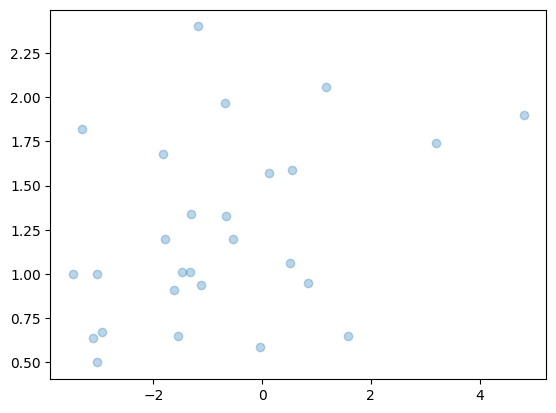

In [14]:
plt.scatter(pls_model.transform(X_test)[:, 0], y_test[:, 2], alpha=0.3, label="ground truth")
plt.show()

In [273]:
# pls_model.transform(X_train).round(2)

In [15]:

import shap

explainer = shap.KernelExplainer(pls_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

c:\Users\46705\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using 108 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 30%|██▉       | 8/27 [03:42<08:50, 27.90s/it]

: 

ValueError: x and y must be the same size

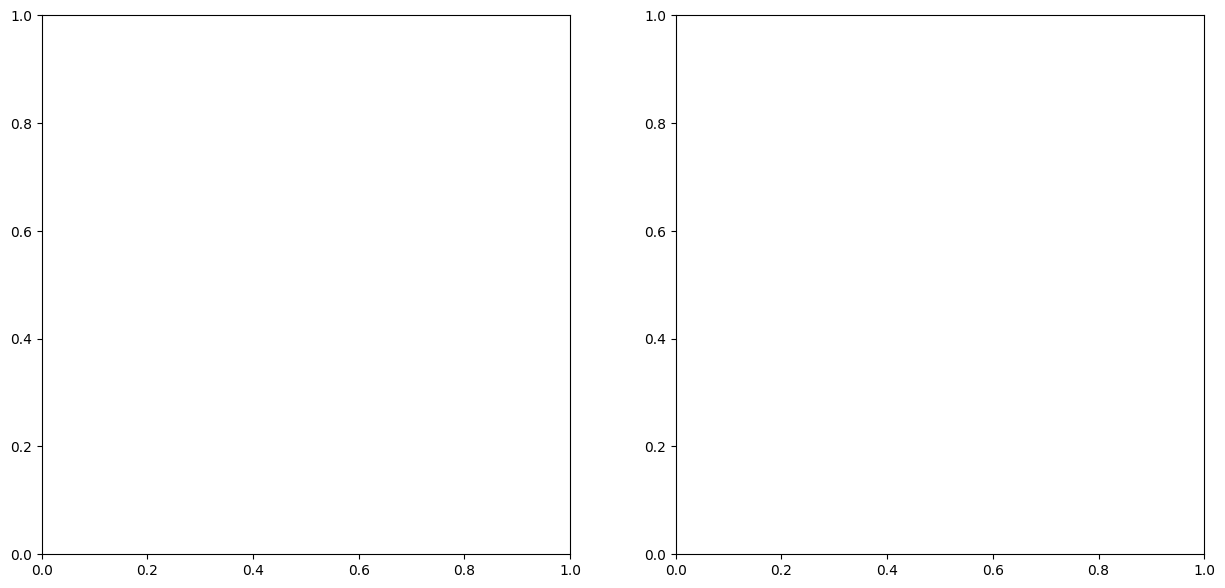

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"] 

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.269
PLS r-squared -0.335


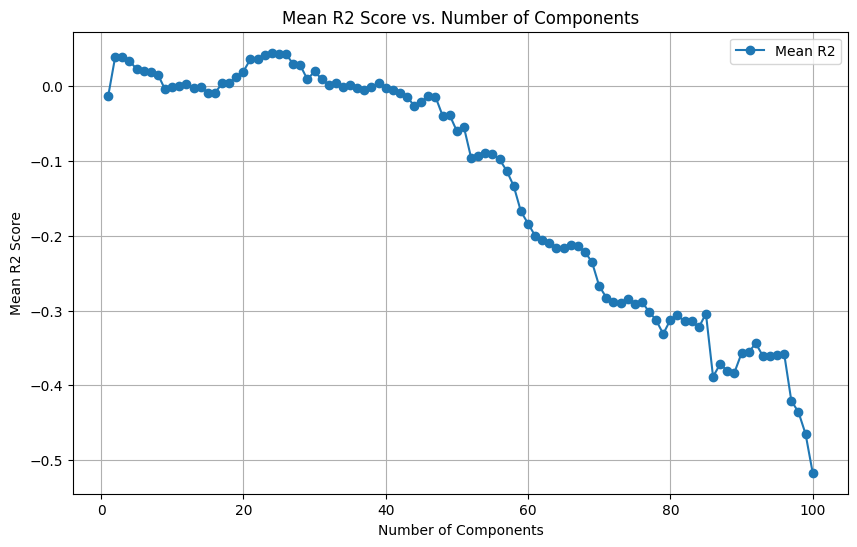

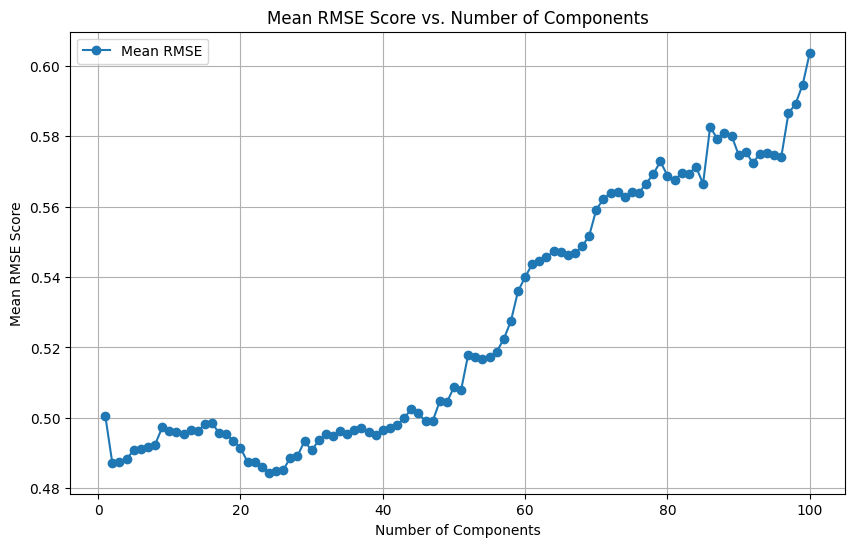

Number of Components: 100, Mean R2: -0.5168, Mean RMSE: 0.6037
Number of Components: 99, Mean R2: -0.4650, Mean RMSE: 0.5947
Number of Components: 98, Mean R2: -0.4358, Mean RMSE: 0.5892
Number of Components: 97, Mean R2: -0.4206, Mean RMSE: 0.5865
Number of Components: 96, Mean R2: -0.3582, Mean RMSE: 0.5742
Number of Components: 95, Mean R2: -0.3600, Mean RMSE: 0.5747
Number of Components: 94, Mean R2: -0.3613, Mean RMSE: 0.5752
Number of Components: 93, Mean R2: -0.3607, Mean RMSE: 0.5751
Number of Components: 92, Mean R2: -0.3437, Mean RMSE: 0.5724
Number of Components: 91, Mean R2: -0.3559, Mean RMSE: 0.5756
Number of Components: 90, Mean R2: -0.3572, Mean RMSE: 0.5747
Number of Components: 89, Mean R2: -0.3830, Mean RMSE: 0.5802
Number of Components: 88, Mean R2: -0.3806, Mean RMSE: 0.5810
Number of Components: 87, Mean R2: -0.3715, Mean RMSE: 0.5792
Number of Components: 86, Mean R2: -0.3884, Mean RMSE: 0.5827
Number of Components: 85, Mean R2: -0.3040, Mean RMSE: 0.5665
Number 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

file_path = "C:/Users/46705/Documents/SpiderSilk/code/random_forest/test_in_r.csv"
data = pd.read_csv(file_path, sep=",")
X = data.iloc[:, :-1]
y = data["tensile_strength"]

n_components_range = range(100, 0, -1)
mean_r2_scores = []
mean_rmse_scores = []

for n_components in n_components_range:
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=n_components), LinearRegression())
    
    r2_scores = []
    rmse_scores = []
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    mean_r2 = np.mean(r2_scores)
    mean_rmse = np.mean(rmse_scores)
    
    mean_r2_scores.append(mean_r2)
    mean_rmse_scores.append(mean_rmse)


plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mean_r2_scores, marker='o', label='Mean R2')
plt.xlabel('Number of Components')
plt.ylabel('Mean R2 Score')
plt.title('Mean R2 Score vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mean_rmse_scores, marker='o', label='Mean RMSE')
plt.xlabel('Number of Components')
plt.ylabel('Mean RMSE Score')
plt.title('Mean RMSE Score vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

for n_components, r2, rmse in zip(n_components_range, mean_r2_scores, mean_rmse_scores):
    print(f"Number of Components: {n_components}, Mean R2: {r2:.4f}, Mean RMSE: {rmse:.4f}")



In [ ]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

c:\Users\46705\miniconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 166 features, but StandardScaler is expecting 13 features as input.

c:\Users\46705\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


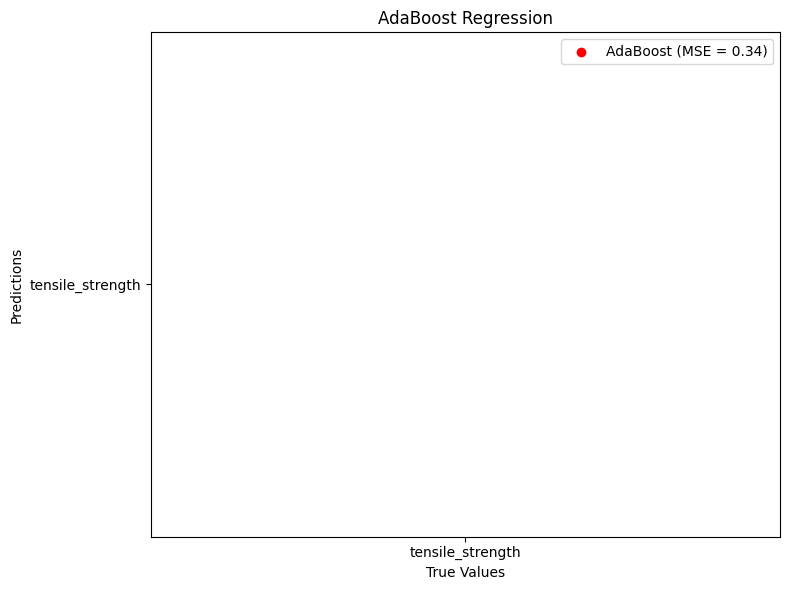

Mean Squared Error for AdaBoost Regression: 0.34


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_pred = adaboost_regressor.predict(X_test)
mse_reg_ab = mean_squared_error(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', label=f'AdaBoost (MSE = {mse_reg_ab:.2f})')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('AdaBoost Regression')
plt.legend()
plt.tight_layout()
plt.show()


print(f'Mean Squared Error for AdaBoost Regression: {mse_reg_ab:.2f}')
